<a href="https://colab.research.google.com/github/sandeep-mannam/README.md/blob/main/aPPle_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
upload=files.upload()

Saving HistoricalData_APPLE.csv to HistoricalData_APPLE.csv


importing all the libraries required for EDA

In [5]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from matplotlib import style
import seaborn as sns
from datetime import date
from sklearn.preprocessing import MinMaxScaler
import math

In [6]:
#importing dataset and making required changes to it
his_data = pd.read_csv('HistoricalData_APPLE.csv', index_col='Date', parse_dates=['Date'])
x = his_data.iloc[: ]
his_data.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-06-09,$127.13,56877940,$127.21,$127.75,$126.52
2021-06-08,$126.74,74403770,$126.60,$128.46,$126.21
2021-06-07,$125.90,71057550,$126.17,$126.32,$124.83
2021-06-04,$125.89,75169340,$124.07,$126.16,$123.85
2021-06-03,$123.54,76229170,$124.68,$124.85,$123.13


In [7]:
#datatypes of all the columns of the historical dataframe
his_data.dtypes

Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object

In [8]:
#removing $ symbol from close,open,high and low columns to convert them to float values
his_data['Close/Last'] = list(map(lambda x: x[1:], his_data['Close/Last'].values))
his_data['Open'] = list(map(lambda x: x[1:], his_data['Open'].values))
his_data['Low'] = list(map(lambda x: x[1:], his_data['Low'].values))
his_data['High'] = list(map(lambda x: x[1:], his_data['High'].values))

In [9]:
#converting the above column to float data type
his_data['Close/Last'] = his_data['Close/Last'].astype(float)
his_data['Open'] = his_data['Open'].astype(float)
his_data['High'] = his_data['High'].astype(float)
his_data['Low'] = his_data['Low'].astype(float)

In [10]:
his_data.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-06-09,127.13,56877940,127.21,127.75,126.52
2021-06-08,126.74,74403770,126.60,128.46,126.21
2021-06-07,125.90,71057550,126.17,126.32,124.83
2021-06-04,125.89,75169340,124.07,126.16,123.85
2021-06-03,123.54,76229170,124.68,124.85,123.13


In [11]:
#finding missing values/Null values
his_data.isnull().sum()

Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

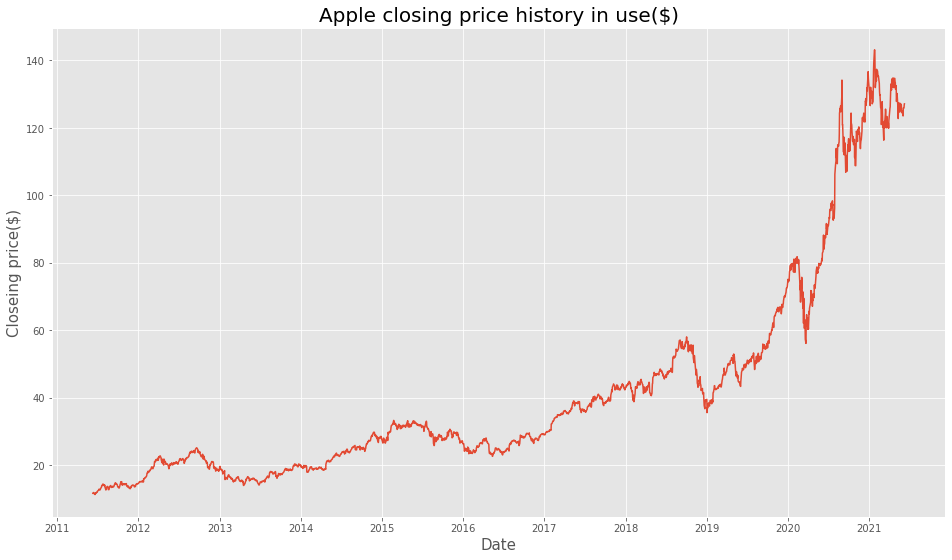

In [12]:
#visualising year wise data
#visualising the historical data closing price (year-wise)
plot.figure(figsize=(16,9))
style.use('ggplot')
plot.plot(his_data['Close/Last'])
plot.title("Apple closing price history in use($)", fontsize = 20)
plot.xlabel("Date", fontsize = 15)
plot.ylabel("Closeing price($)",fontsize =15)
plot.show()

visualising month wise data

In [13]:
#visualising month wise data
his_data = pd.read_csv('HistoricalData_APPLE.csv', parse_dates=['Date'])
his_data

,Date,Close/Last,Volume,Open,High,Low
0,2021-06-09,$127.13,56877940,$127.21,$127.75,$126.52
1,2021-06-08,$126.74,74403770,$126.60,$128.46,$126.21
2,2021-06-07,$125.90,71057550,$126.17,$126.32,$124.83
3,2021-06-04,$125.89,75169340,$124.07,$126.16,$123.85
4,2021-06-03,$123.54,76229170,$124.68,$124.85,$123.13
...,...,...,...,...,...,...
2511,2011-06-16,$11.61,507299317,$11.68,$11.74,$11.37
2512,2011-06-15,$11.67,395841722,$11.78,$11.80,$11.60
2513,2011-06-14,$11.87,333995906,$11.79,$11.90,$11.76
2514,2011-06-13,$11.66,329376468,$11.69,$11.73,$11.61


In [14]:
his_data['Date'] = list(map(lambda x: x.strftime('%B') + ' ' + str(x.year),his_data['Date']))
his_data

,Date,Close/Last,Volume,Open,High,Low
0,June 2021,$127.13,56877940,$127.21,$127.75,$126.52
1,June 2021,$126.74,74403770,$126.60,$128.46,$126.21
2,June 2021,$125.90,71057550,$126.17,$126.32,$124.83
3,June 2021,$125.89,75169340,$124.07,$126.16,$123.85
4,June 2021,$123.54,76229170,$124.68,$124.85,$123.13
...,...,...,...,...,...,...
2511,June 2011,$11.61,507299317,$11.68,$11.74,$11.37
2512,June 2011,$11.67,395841722,$11.78,$11.80,$11.60
2513,June 2011,$11.87,333995906,$11.79,$11.90,$11.76
2514,June 2011,$11.66,329376468,$11.69,$11.73,$11.61


In [15]:
#removing the $ symbol from close/last ,low ,high, open columns and convert them to float values
his_data['Close/Last'] = list(map(lambda x: x[1:], his_data['Close/Last'].values))
his_data['Open'] = list(map(lambda x: x[1:], his_data['Open'].values))
his_data['High'] = list(map(lambda x: x[1:], his_data['High'].values))
his_data['Low'] = list(map(lambda x: x[1:], his_data['Low'].values))

In [16]:
#converting the above columns to float datatype
his_data['Close/Last'] = his_data['Close/Last'].astype(float)
his_data['Open'] = his_data['Open'].astype(float)
his_data['High'] = his_data['High'].astype(float)
his_data['Low'] = his_data['Low'].astype(float)

In [17]:
his_data.head()

,Date,Close/Last,Volume,Open,High,Low
0,June 2021,127.13,56877940,127.21,127.75,126.52
1,June 2021,126.74,74403770,126.60,128.46,126.21
2,June 2021,125.90,71057550,126.17,126.32,124.83
3,June 2021,125.89,75169340,124.07,126.16,123.85
4,June 2021,123.54,76229170,124.68,124.85,123.13


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


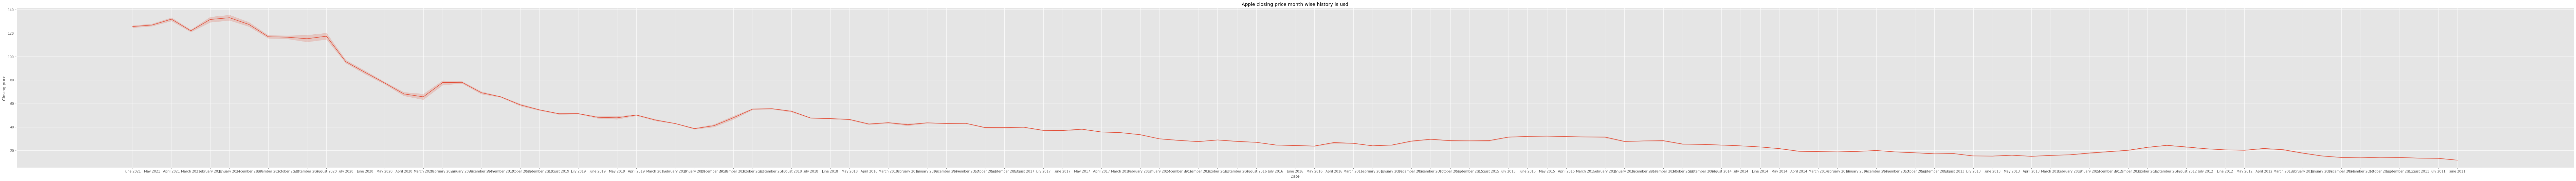

In [18]:
#visualizing the stock closing price month-wise
plot.figure(figsize=(140,9))
style.use('ggplot')
sns.lineplot(his_data['Date'],his_data['Close/Last'])
plot.title("Apple closing price month wise history is usd")
plot.xlabel("Date")
plot.ylabel("Closing price")
plot.show()

In [19]:
his_data.head()

,Date,Close/Last,Volume,Open,High,Low
0,June 2021,127.13,56877940,127.21,127.75,126.52
1,June 2021,126.74,74403770,126.60,128.46,126.21
2,June 2021,125.90,71057550,126.17,126.32,124.83
3,June 2021,125.89,75169340,124.07,126.16,123.85
4,June 2021,123.54,76229170,124.68,124.85,123.13


In [20]:
his_data.tail()

,Date,Close/Last,Volume,Open,High,Low
2511,June 2011,11.61,507299317,11.68,11.74,11.37
2512,June 2011,11.67,395841722,11.78,11.80,11.60
2513,June 2011,11.87,333995906,11.79,11.90,11.76
2514,June 2011,11.66,329376468,11.69,11.73,11.61
2515,June 2011,11.64,433801306,11.81,11.85,11.63


fearturing and training dataset

In [21]:
#gathering the training data set
dataset = his_data.filter(['Close/Last']).values
trainset_len = math.ceil(len(dataset)*0.8)


In [26]:
#feature scaling for the data set
scale = MinMaxScaler(feature_range=(0,1))
scale_data = scale.fit_transform(dataset)
print(scale_data)

[[0.87846854]
 [0.87551175]
 [0.86914329]
 ...
 [0.00462472]
 [0.0030326 ]
 [0.00288097]]


In [27]:
#training set creating
trainset_len = math.ceil(len(dataset) * 0.8)
train_data = scaled_data[0:trainset_len, :]
x_train = []
y_train = []
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<= 61:
    print(x_train)
    print(y_train)

[array([0.87846854, 0.87551175, 0.86914329, 0.86906748, 0.85125095,
       0.86277483, 0.85686126, 0.85936315, 0.86444276, 0.87634572,
       0.87672479, 0.87824109, 0.86557998, 0.87983321, 0.85996967,
       0.86118271, 0.87194845, 0.88089462, 0.86209249, 0.84541319,
       0.86921911, 0.87634572, 0.90181956, 0.89825625, 0.88582259,
       0.88392722, 0.91948446, 0.91129644, 0.92661107, 0.92736922,
       0.93351024, 0.93601213, 0.93297953, 0.91493556, 0.9267627 ,
       0.92380591, 0.93692191, 0.93176649, 0.9343442 , 0.91561789,
       0.9338135 , 0.90962851, 0.92297195, 0.90295679, 0.88430629,
       0.87149356, 0.86914329, 0.84715694, 0.84071266, 0.82365428,
       0.83495072, 0.83358605, 0.82888552, 0.82509477, 0.84366945,
       0.85011372, 0.82433662, 0.82843063, 0.86050038, 0.86664139])]
[0.8546626231993935]
[array([0.87846854, 0.87551175, 0.86914329, 0.86906748, 0.85125095,
       0.86277483, 0.85686126, 0.85936315, 0.86444276, 0.87634572,
       0.87672479, 0.87824109, 0.8655